<a href="https://colab.research.google.com/github/rocket0l4/Coin-fetch-by-api/blob/main/Matic_Polygon__USD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using CoinCap API
- Code for Ethereum

In [49]:
import requests
import csv
import json

url = "http://api.coincap.io/v2/assets/polygon/history?interval=d1"

payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)

json_data = json.loads(response.text.encode('utf8'))

print(response.text)


{"data":[{"priceUsd":"0.51819436927358509576","time":1697587200000,"date":"2023-10-18T00:00:00.000Z"},{"priceUsd":"0.51342239818166818847","time":1697673600000,"date":"2023-10-19T00:00:00.000Z"},{"priceUsd":"0.53203273596038087965","time":1697760000000,"date":"2023-10-20T00:00:00.000Z"},{"priceUsd":"0.55638881001868184604","time":1697846400000,"date":"2023-10-21T00:00:00.000Z"},{"priceUsd":"0.57500279216482324208","time":1697932800000,"date":"2023-10-22T00:00:00.000Z"},{"priceUsd":"0.61563667663444247222","time":1698019200000,"date":"2023-10-23T00:00:00.000Z"},{"priceUsd":"0.63847765324848426882","time":1698105600000,"date":"2023-10-24T00:00:00.000Z"},{"priceUsd":"0.63232608271778761729","time":1698192000000,"date":"2023-10-25T00:00:00.000Z"},{"priceUsd":"0.63702063223204696792","time":1698278400000,"date":"2023-10-26T00:00:00.000Z"},{"priceUsd":"0.61964437059276041472","time":1698364800000,"date":"2023-10-27T00:00:00.000Z"},{"priceUsd":"0.62127406108895772271","time":1698451200000,"da

#Storing the data

In [50]:
matic_data = json_data['data']

In [62]:
import pandas as pd
df = pd.DataFrame(matic_data)
df.to_csv('matic-usd.csv',index = False)

In [52]:
df

,priceUsd,time,date
0,0.51819436927358509576,1697587200000,2023-10-18T00:00:00.000Z
1,0.51342239818166818847,1697673600000,2023-10-19T00:00:00.000Z
2,0.53203273596038087965,1697760000000,2023-10-20T00:00:00.000Z
3,0.55638881001868184604,1697846400000,2023-10-21T00:00:00.000Z
4,0.57500279216482324208,1697932800000,2023-10-22T00:00:00.000Z
...,...,...,...
359,0.37952550489698946528,1728604800000,2024-10-11T00:00:00.000Z
360,0.38003360275640659472,1728691200000,2024-10-12T00:00:00.000Z
361,0.37963761512611338201,1728777600000,2024-10-13T00:00:00.000Z
362,0.37991844854521504632,1728864000000,2024-10-14T00:00:00.000Z


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   priceUsd  364 non-null    object
 1   time      364 non-null    int64 
 2   date      364 non-null    object
dtypes: int64(1), object(2)
memory usage: 8.7+ KB


#Only required columns saved

In [55]:
df = pd.DataFrame(matic_data, columns=['priceUsd','date'])
df

,priceUsd,date
0,0.51819436927358509576,2023-10-18T00:00:00.000Z
1,0.51342239818166818847,2023-10-19T00:00:00.000Z
2,0.53203273596038087965,2023-10-20T00:00:00.000Z
3,0.55638881001868184604,2023-10-21T00:00:00.000Z
4,0.57500279216482324208,2023-10-22T00:00:00.000Z
...,...,...
359,0.37952550489698946528,2024-10-11T00:00:00.000Z
360,0.38003360275640659472,2024-10-12T00:00:00.000Z
361,0.37963761512611338201,2024-10-13T00:00:00.000Z
362,0.37991844854521504632,2024-10-14T00:00:00.000Z


#Converting into Datetime format

In [56]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   priceUsd  364 non-null    object             
 1   date      364 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 5.8+ KB


In [57]:
df['date'] = df['date'].dt.tz_localize(None)
df

,priceUsd,date
0,0.51819436927358509576,2023-10-18
1,0.51342239818166818847,2023-10-19
2,0.53203273596038087965,2023-10-20
3,0.55638881001868184604,2023-10-21
4,0.57500279216482324208,2023-10-22
...,...,...
359,0.37952550489698946528,2024-10-11
360,0.38003360275640659472,2024-10-12
361,0.37963761512611338201,2024-10-13
362,0.37991844854521504632,2024-10-14


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   priceUsd  364 non-null    object        
 1   date      364 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 5.8+ KB


#Changing dataype from Obj to Float

In [59]:
df['priceUsd'] = pd.to_numeric(df['priceUsd'],errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   priceUsd  364 non-null    float64       
 1   date      364 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [60]:
df

,priceUsd,date
0,0.518194,2023-10-18
1,0.513422,2023-10-19
2,0.532033,2023-10-20
3,0.556389,2023-10-21
4,0.575003,2023-10-22
...,...,...
359,0.379526,2024-10-11
360,0.380034,2024-10-12
361,0.379638,2024-10-13
362,0.379918,2024-10-14


#Visualization

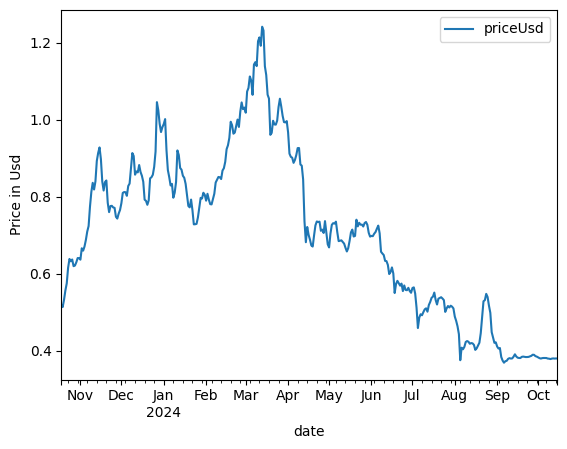

In [61]:
import matplotlib.pyplot as plt
df.plot(x='date',y = 'priceUsd',kind = 'line')
plt.ylabel('Price in Usd')
plt.show()